# Введение 
▎О наборе данных

Обзор:
Этот набор данных включает информацию для оценки уровней ожирения у людей из стран Мексики, Перу и Колумбии, основанную на их пищевых привычках и физическом состоянии. Данные содержат 17 атрибутов и 2111 записей, которые помечены классом NObesity (Уровень ожирения), что позволяет классифицировать данные по значениям: Нехватка веса, Нормальный вес, Избыточный вес I уровня, Избыточный вес II уровня, Ожирение I типа, Ожирение II типа и Ожирение III типа.

Детали данных:

• Пол: Пол

• Возраст: Возраст

• Рост: в метрах

• Вес: в килограммах

• Семейная история: Есть ли у кого-то из членов семьи проблемы с избыточным весом?

• FAVC: Часто ли вы едите высококалорийную пищу?

• FCVC: Обычно ли вы едите овощи в своих приемах пищи?

• NCP: Сколько основных приемов пищи у вас в день?

• CAEC: Едите ли вы что-либо между приемами пищи?

• Курение: Курите ли вы?

• CH2O: Сколько воды вы пьете ежедневно?

• SCC: Следите ли вы за калориями, которые едите ежедневно?

• FAF: Как часто вы занимаетесь физической активностью?

• TUE: Сколько времени вы проводите с технологическими устройствами, такими как мобильный телефон, видеоигры, телевизор, компьютер и другие?

• CALC: Как часто вы употребляете алкоголь?

• MTRANS: Какой транспорт вы обычно используете?

• Уровень ожирения (Целевая колонка): Уровень ожирения

In [1]:
import pandas as pd 
import numpy as np 
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import missingno as mno
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Obesity prediction.csv")
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


зардлим пизнаки на числовые и категориалньые

In [3]:
num = list(df.select_dtypes(exclude='object').columns)
cat = list(df.select_dtypes(include='object').columns)
cat.remove('Obesity')


In [4]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


Посмотрим на наличие выбросов 

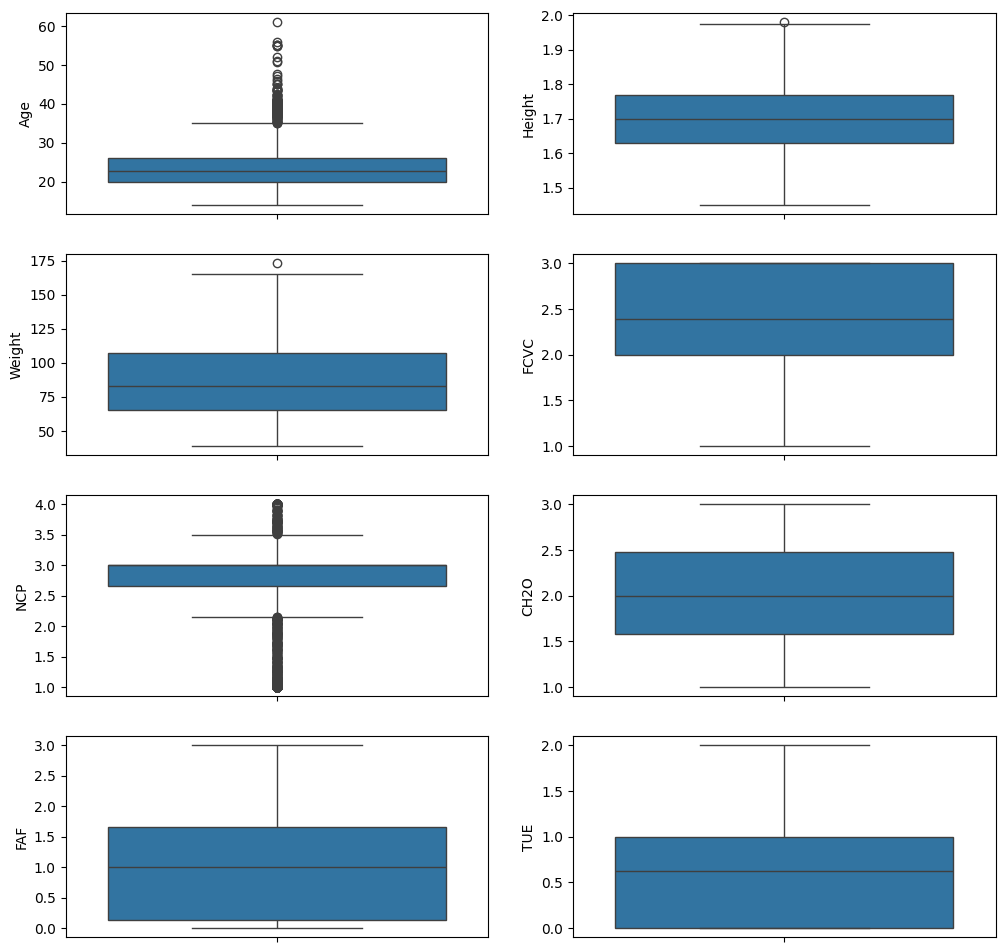

In [5]:
plt.figure(figsize=(12,12))
for _ in num:
   
    plt.subplot(4,2,num.index(_)+ 1)
    
    sns.boxplot(df[_])

как мы можем видеть выбросы есть только в столбце года, но 61 не прывышает максильманый возраст , даже не попадает в пенсионный, потребление еды в день может быть и 0 и 4 , тоже связано с разными положениями

Проверка на пропуски и нули

<Axes: >

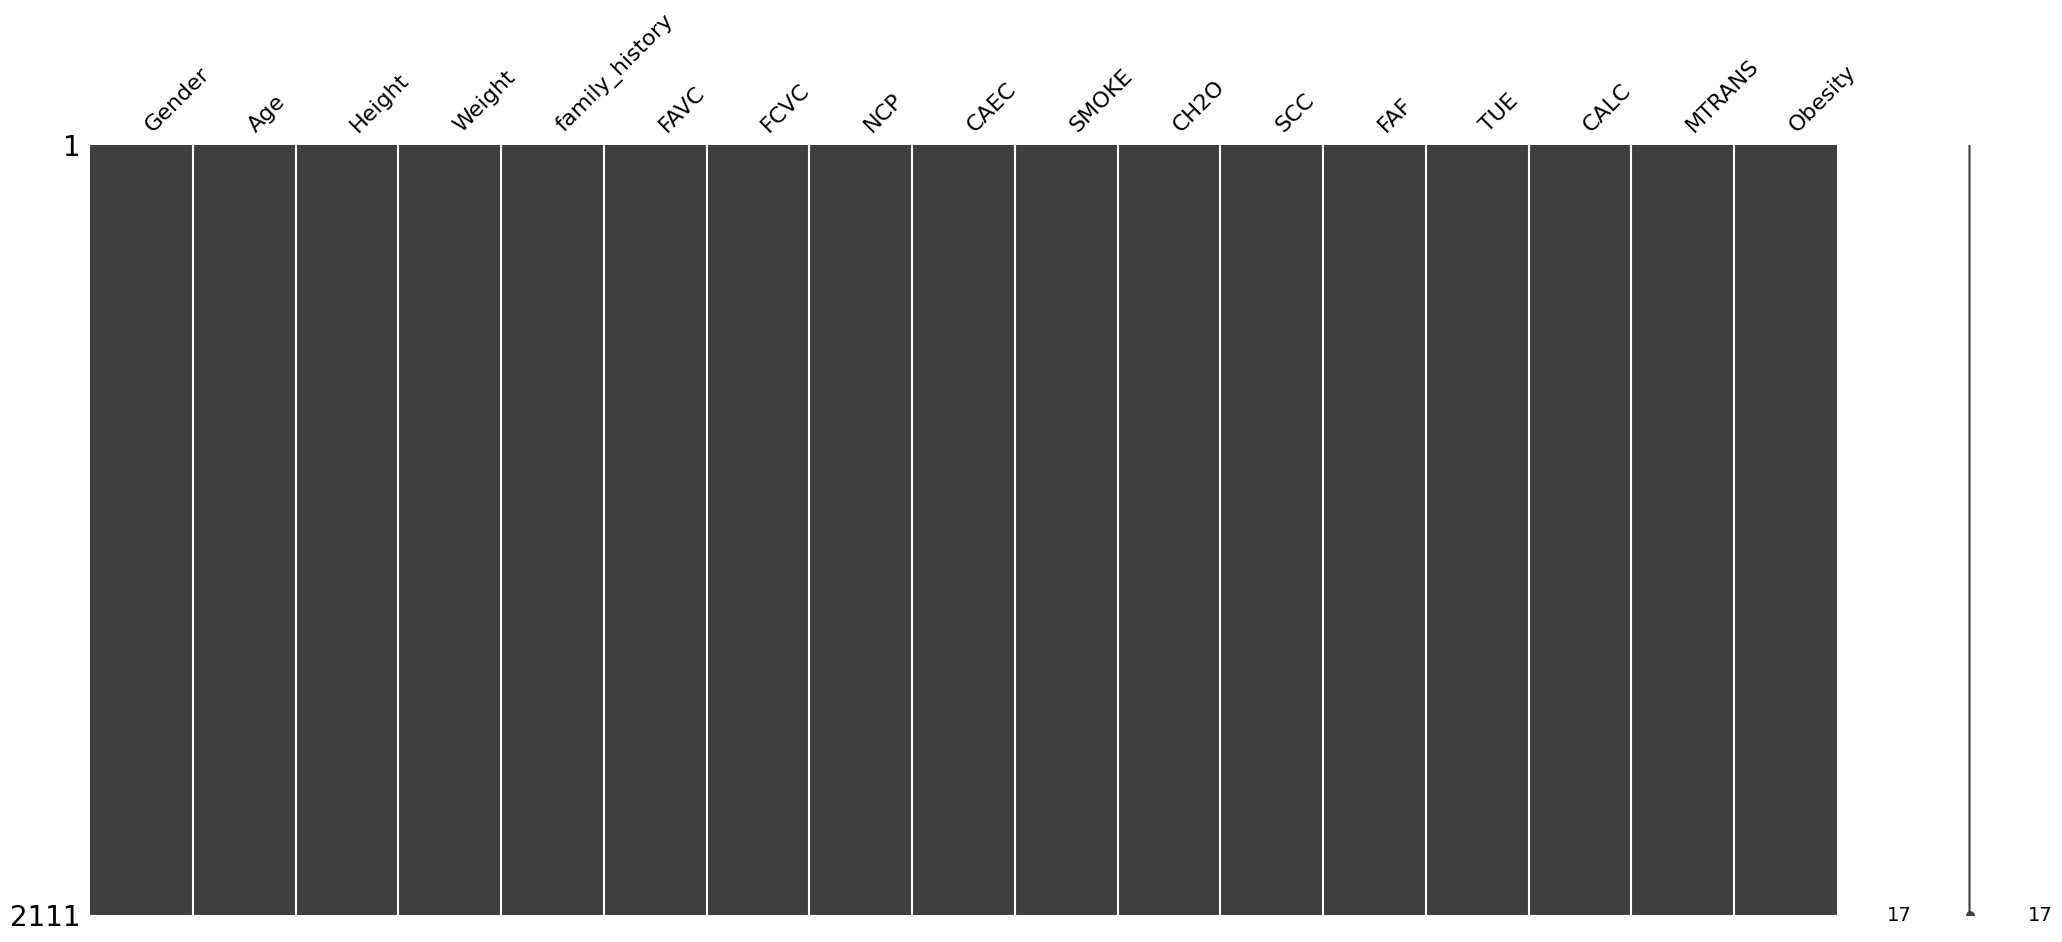

In [6]:
mno.matrix(df)


In [7]:
### Кодирвоание таргета

encod_params =  {
    'Normal_Weight' : 0,
    'Overweight_Level_I' : 1,
    'Overweight_Level_II' : 2,
    'Obesity_Type_I' : 3,
    'Insufficient_Weight' : 4,
    'Obesity_Type_II' : 5,
    'Obesity_Type_III' : 6
}
encod_params_inv = {v: k for k, v in encod_params.items()}

encod_df = df.copy()
encod_df['Target'] = encod_df['Obesity'].map(encod_params)
encod_df = encod_df.drop('Obesity', axis = 1)
encod_df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Target
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,0
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,0
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,0
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,1
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,2


In [8]:
### закодируем признаки 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split


preprocces = ColumnTransformer(
    transformers=[
        ('OHE', OneHotEncoder(), cat),
        ('Scaler', StandardScaler(), num)
    ]
)


X = encod_df.drop('Target', axis = 1)
y = encod_df['Target']


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.15, stratify=y)

In [9]:
### Обучение модели 

from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

model = GradientBoostingClassifier(learning_rate=1,
                                   max_depth=2,
                                   n_estimators=500)

In [10]:
from sklearn.pipeline import Pipeline

GBC_pipe = Pipeline(
    [
        ('preprocessor', preprocces),
        ('GradientBoostingClassifier', model)
    ]
)


In [11]:
GBC_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('OHE', OneHotEncoder(),
                                                  ['Gender', 'family_history',
                                                   'FAVC', 'CAEC', 'SMOKE',
                                                   'SCC', 'CALC', 'MTRANS']),
                                                 ('Scaler', StandardScaler(),
                                                  ['Age', 'Height', 'Weight',
                                                   'FCVC', 'NCP', 'CH2O', 'FAF',
                                                   'TUE'])])),
                ('GradientBoostingClassifier',
                 GradientBoostingClassifier(learning_rate=1, max_depth=2,
                                            n_estimators=500))])

In [12]:
from sklearn.metrics import accuracy_score, f1_score
gbc_predict = GBC_pipe.predict(X_test)

print(f'Точность Градиентного бустинга {accuracy_score(y_true=y_test,y_pred=gbc_predict):.2g}')
print(f'F1_мера {f1_score(y_true=y_test, y_pred=gbc_predict, average="macro"):0.2g}')

Точность Градиентного бустинга 0.97
F1_мера 0.97


In [18]:
import joblib as jl 
jl.dump(GBC_pipe, 'GBC_pipe.pkl')

['GBC_pipe.pkl']

In [13]:
from sklearn.model_selection import GridSearchCV

params_grid ={
    'GradientBoostingClassifier__max_depth' :  [1], 
    'GradientBoostingClassifier__learning_rate': [0.05, 0.1],
    'GradientBoostingClassifier__subsample': [0.8],
    'GradientBoostingClassifier__n_estimators' : [300]

}

search = GridSearchCV(
    estimator=GBC_pipe,
    param_grid=params_grid,
    cv = 5,
    scoring='f1_macro'
)
search.fit(X_train,y_train)
print(f'Лучшие параметры: {search.best_params_}')
print(f'Лучшие показатели: {search.best_score_}')

Лучшие параметры: {'GradientBoostingClassifier__learning_rate': 0.05, 'GradientBoostingClassifier__max_depth': 1, 'GradientBoostingClassifier__n_estimators': 300, 'GradientBoostingClassifier__subsample': 0.8}
Лучшие показатели: nan


In [16]:
search.score(X_test,y_test)

0.8941648755131676

In [17]:
import joblib as jl 
jl.dump(search,'GBM_search.pkl')

['GBM_search.pkl']

In [22]:
search_pred = search.predict(X_test)
print(f"Ошибка MRSE : {(np.mean(y_test - search_pred)** 2):.3g}")

Ошибка MRSE : 0.00224
